# Example Run of BALANCER 

This notebook demonstrates how to use the BALANCER framework for predicting improvements in classification performance using various data augmentation techniques on time series datasets.

In [12]:
import numpy as np
import pandas as pd
from balancer.balancer import BALANCER
from balancer.utils import get_kendalltau, get_rmse, get_mean_rank
from balancer.global_vars import METHODS, MODELS
import os
import matplotlib.pyplot as plt

## Step 1: Load and Prepare Data

In [13]:
# Demonstrate how to use the BALANCER class with ECG5000 dataset
data = pd.read_csv('data/ProximalPhalanxOutlineCorrect/ProximalPhalanxOutlineCorrect_TRAIN.tsv', header=None, sep='\t')
data

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1,-0.706732,-0.652137,-0.456754,-0.210081,0.075267,0.349941,0.595007,0.779359,1.062273,...,-1.193603,-1.320345,-1.391020,-1.300293,-1.154705,-1.031715,-0.876503,-0.757643,-0.607344,-0.526601
1,1,-0.764312,-0.663666,-0.488526,-0.211725,0.055587,0.380786,0.645506,0.860626,1.106183,...,-1.230175,-1.324922,-1.308821,-1.209959,-1.104691,-0.966770,-0.820150,-0.672816,-0.560540,-0.514284
2,1,-0.838371,-0.776588,-0.570641,-0.307699,-0.030774,0.256841,0.548296,0.822461,1.139188,...,-1.051418,-1.173354,-1.256002,-1.240058,-1.140534,-1.011349,-0.891458,-0.751234,-0.591673,-0.561945
3,1,-0.778612,-0.705656,-0.538213,-0.290638,-0.009354,0.310679,0.573211,0.793301,1.113998,...,-1.211594,-1.303882,-1.337321,-1.280857,-1.143866,-1.012164,-0.828189,-0.662074,-0.494444,-0.439017
4,0,-0.747953,-0.663562,-0.452362,-0.217678,0.080679,0.384476,0.632748,0.847531,1.149007,...,-1.186467,-1.051509,-0.968101,-0.839231,-0.672213,-0.576554,-0.468048,-0.392345,-0.438290,-0.603100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,-0.458376,-0.392637,-0.226390,-0.095675,0.081116,0.294944,0.550206,0.777570,0.976315,...,-1.068003,-1.068003,-1.068003,-1.068003,-1.068003,-1.068003,-1.068003,-1.068003,-1.068003,-1.068003
596,0,-0.517269,-0.425612,-0.257794,-0.079834,0.158497,0.406849,0.658162,0.939007,1.165955,...,-1.068059,-1.068059,-1.068059,-1.068059,-1.068059,-1.068059,-1.068059,-1.068059,-1.068059,-1.068059
597,0,-0.499283,-0.419348,-0.238660,-0.078147,0.186623,0.430154,0.669143,0.946190,1.177404,...,-1.068301,-1.068301,-1.068301,-1.068301,-1.068301,-1.068301,-1.068301,-1.068301,-1.068301,-1.068301
598,1,-0.570949,-0.478905,-0.322820,-0.082836,0.144838,0.372338,0.658126,0.931626,1.183377,...,-1.042794,-1.042794,-1.042794,-1.042794,-1.042794,-1.042794,-1.042794,-1.042794,-1.042794,-1.042794


## Step 2: Initialize BALANCER

In [14]:
# Initialize BALANCER with pre-trained models (set train=True to train new models)
balancer = BALANCER(param_file='balancer/models_param.json', train=False)

## Step 3: Make Predictions

In [15]:
# Predict using the BALANCER model
ranks = balancer.predict(data)
predictions = balancer.predict(data, full_results=True)

print("Rank Predictions:")
ranks



Rank Predictions:


classifier,DTW-KNN,KERNEL,NN,RF,SHAPELET,TS-RF
method,,,,,,
Ada,6.0,1.0,7.0,4.0,3.0,7.0
DTW-SMOTE,5.0,7.0,2.0,2.0,4.0,1.0
GAN,2.0,5.0,6.0,3.0,7.0,5.0
Jit,3.0,3.0,3.0,7.0,5.0,4.0
ROS,1.0,2.0,1.0,5.0,2.0,2.0
SMOTE,7.0,4.0,5.0,6.0,6.0,6.0
TW,4.0,6.0,4.0,1.0,1.0,3.0


In [16]:
print("Values Predictions:")
predictions

Values Predictions:


classifier,DTW-KNN,KERNEL,NN,RF,SHAPELET,TS-RF
method,,,,,,
Ada,0.005185,0.087078,-0.009231,-0.003853,-0.083830,-0.068181
DTW-SMOTE,0.008377,0.009324,0.031179,0.012866,-0.097968,0.053981
GAN,0.028434,0.028562,-0.003275,0.005140,-0.206461,0.000974
Jit,0.028281,0.046602,0.026694,-0.033958,-0.140489,0.004024
ROS,0.036095,0.079579,0.036282,-0.004183,-0.051025,0.022819
SMOTE,-0.013212,0.029682,0.017443,-0.005578,-0.189296,0.000080
TW,0.015964,0.023350,0.020002,0.015831,0.118321,0.004179


## Step 4: Evaluate Predictions

In [17]:
actual_data = pd.read_csv('data/ProximalPhalanxOutlineCorrect_res.csv' )
actual_data.set_index('method', inplace=True)
actual_data.columns.name = 'classifier'
actual_data

classifier,DTW-KNN,KERNEL,NN,RF,SHAPELET,TS-RF
method,,,,,,
Ada,-0.014017,0.004266,0.092406,-0.002825,-0.062160,-0.007879
DTW-SMOTE,0.009761,0.012060,0.109302,0.005197,-0.242141,0.001004
GAN,0.037920,0.008147,0.083415,-0.003869,-0.136191,0.002122
Jit,0.000000,-0.031793,0.108813,-0.012913,-0.325256,0.000287
ROS,0.015271,0.005413,0.094649,0.006359,-0.242141,-0.002402
SMOTE,0.020948,0.007490,0.103992,0.000791,-0.242141,-0.001086
TW,0.000000,-0.000016,0.106459,-0.001392,0.000000,-0.001761


In [18]:
#  Kendall Tau correlation per classifier
tau_scores = get_kendalltau(actual_data, predictions)
print(tau_scores)

#  RMSE per Meta-Mode
rmse_value = get_rmse(actual_data, predictions)
print(rmse_value)   

             DTW-KNN    KERNEL       NN        RF  SHAPELET     TS-RF
kendall_tau  0.19518 -0.428571  0.52381  0.142857  0.308607  0.142857
           Ada  DTW-SMOTE       GAN       Jit       ROS     SMOTE        TW
RMSE  0.060088   0.070432  0.046623  0.089708  0.088141  0.044693  0.061383


## Step 5: Visualize Results

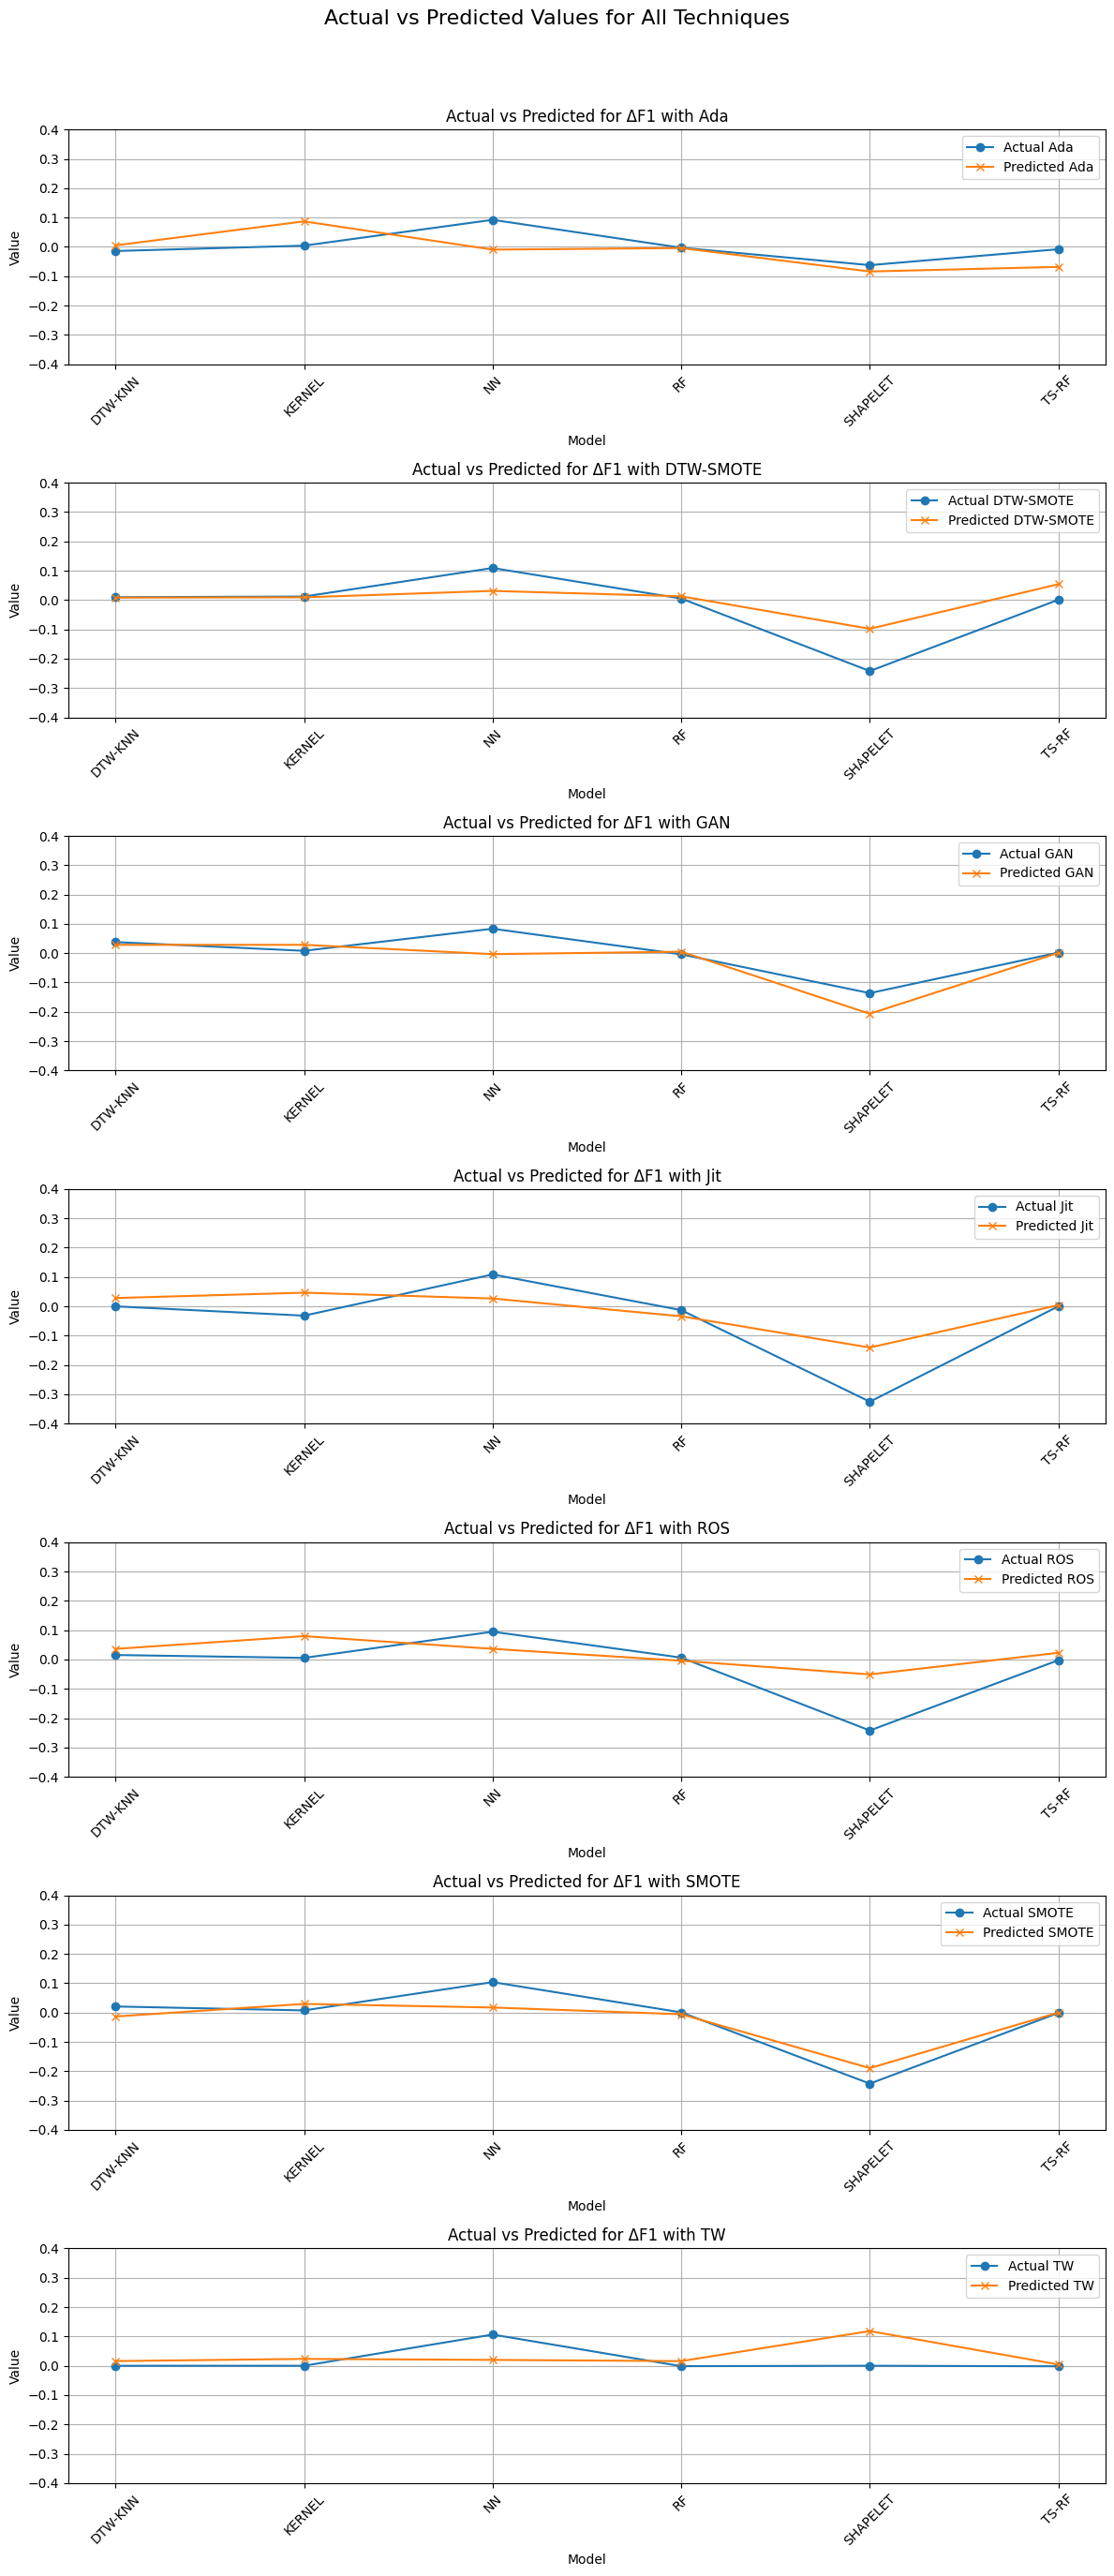

In [19]:
# Mean Rank per Meta-Model
methods = predictions.index.unique()
n_methods = len(methods)
fig, axs = plt.subplots(n_methods, figsize=(12, 4 * n_methods)) 
fig.suptitle('Actual vs Predicted Values for All Techniques', fontsize=16)

for i, method in enumerate(methods):
    actual_values = actual_data.loc[method]
    predicted_values = predictions.loc[method]
    
    
    sample_index = actual_values.index  

    axs[i].plot(sample_index, actual_values, label=f'Actual {method}', marker='o')
    axs[i].plot(sample_index, predicted_values, label=f'Predicted {method}', marker='x')
    axs[i].set_title(f'Actual vs Predicted for ΔF1 with {method}')
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel('Value')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    axs[i].set_xticks(sample_index)  
    axs[i].tick_params(axis='x', rotation=45) 
    axs[i].set_ylim(-0.4, 0.4)  


plt.tight_layout(rect=[0, 0, 1, 0.96])


plt.show()

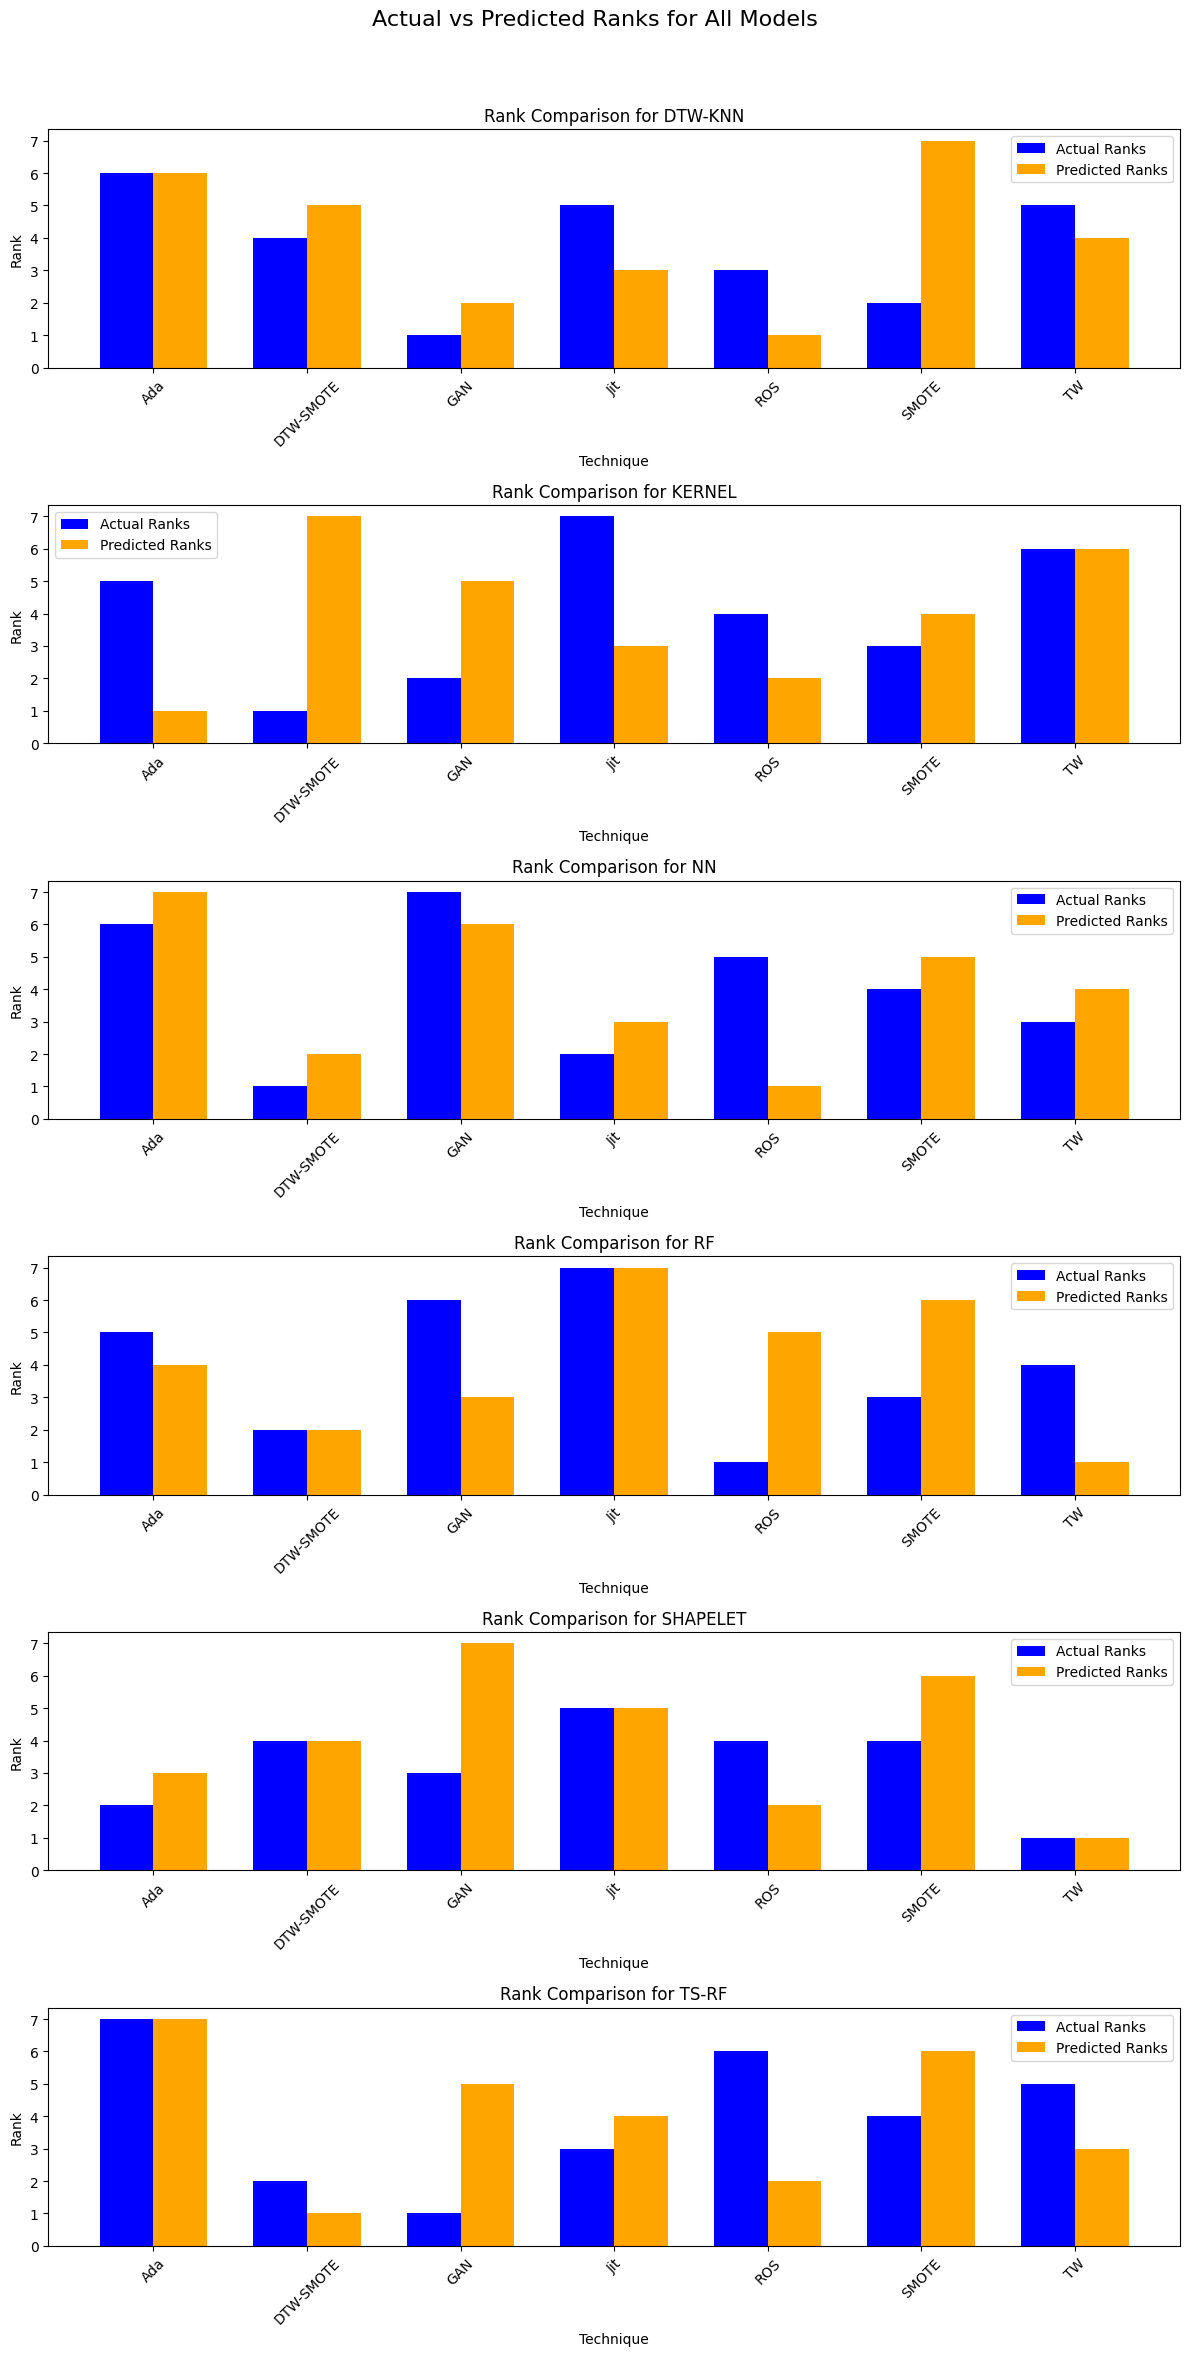

In [20]:
# Actual vs Predicted Ranks for all models scenarios
actual_ranks = actual_data.rank(method='dense', ascending=False)
predicted_ranks = predictions.rank(method='dense', ascending=False)

models = actual_ranks.columns  
techniques = actual_ranks.index  

n_models = len(models)
fig, axs = plt.subplots(n_models, figsize=(12, 4 * n_models))  
fig.suptitle('Actual vs Predicted Ranks for All Models', fontsize=16)


for i, model in enumerate(models):
    actual_values = actual_ranks[model]
    predicted_values = predicted_ranks[model]

    
    bar_width = 0.35
    bar_positions = np.arange(len(techniques))

   
    axs[i].bar(bar_positions, actual_values, bar_width, label='Actual Ranks', color='blue')
    axs[i].bar(bar_positions + bar_width, predicted_values, bar_width, label='Predicted Ranks', color='orange')
    axs[i].set_title(f'Rank Comparison for {model}')
    axs[i].set_xlabel('Technique')
    axs[i].set_ylabel('Rank')
    axs[i].set_xticks(bar_positions + bar_width / 2)  
    axs[i].set_xticklabels(techniques, rotation=45)
    axs[i].legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])


plt.show()